## California Housing Data

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Exploratory Data Analysis (EDA)

In [64]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [67]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


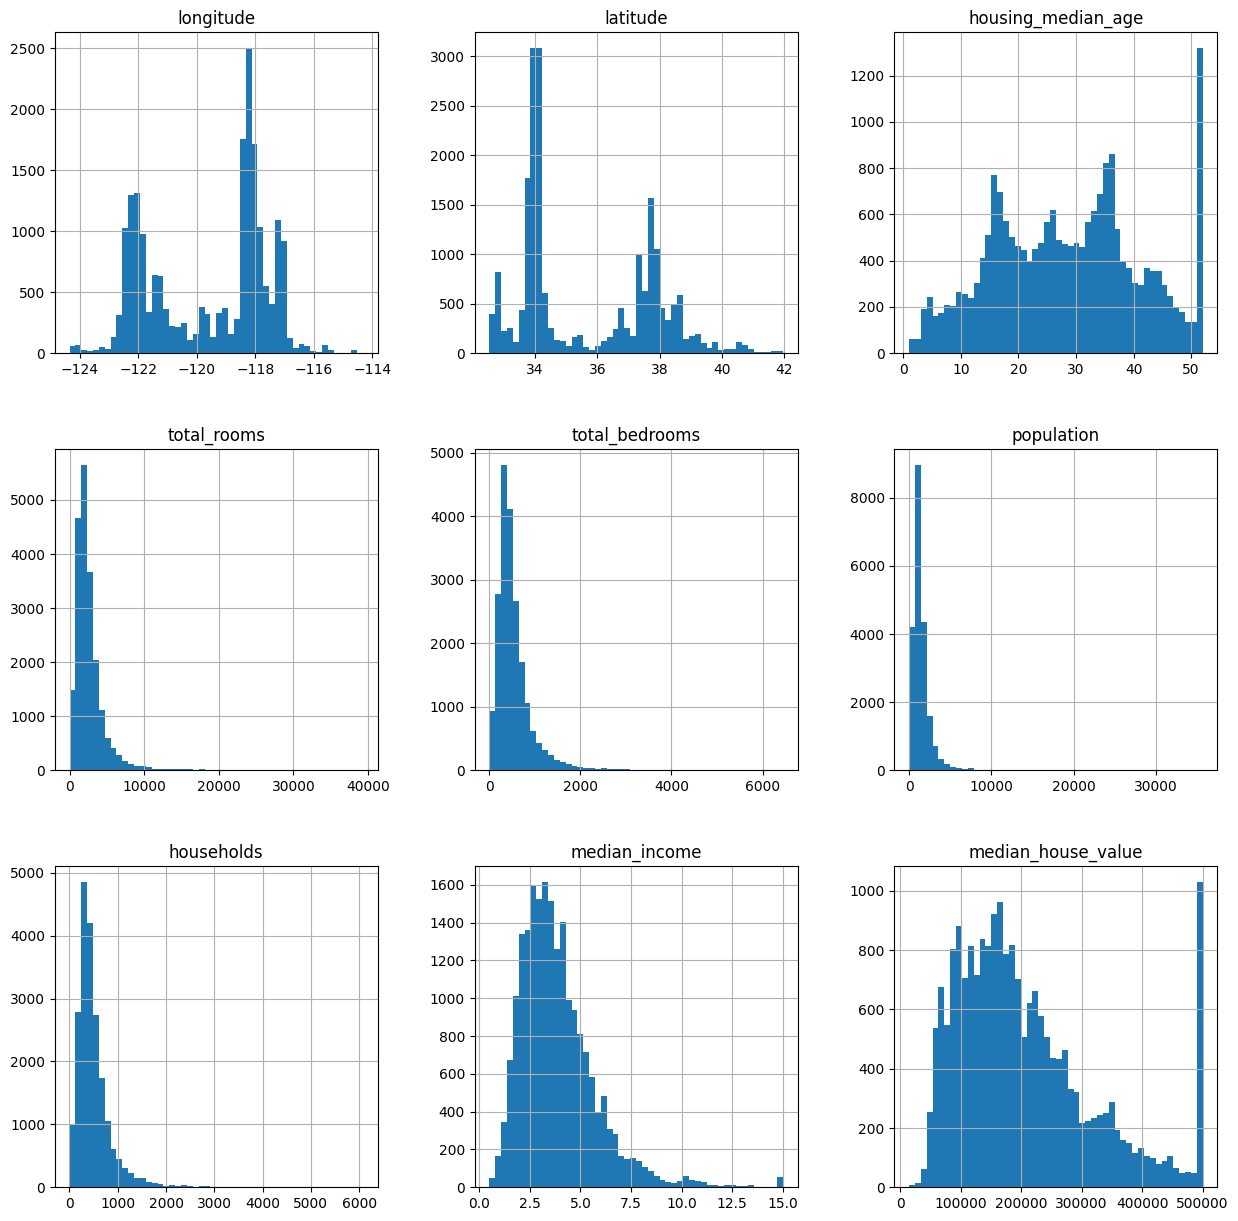

In [68]:
housing.hist(bins=50, figsize=(15, 15))
plt.show()

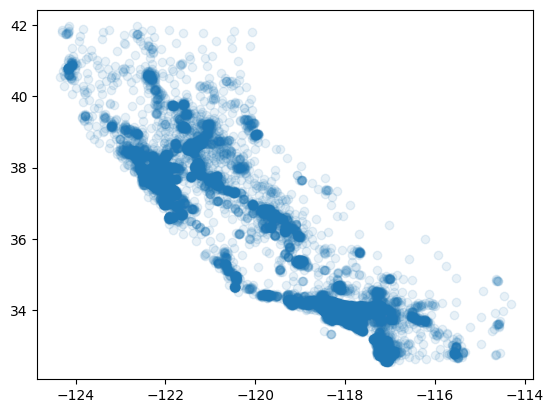

In [69]:
plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1)
plt.show()

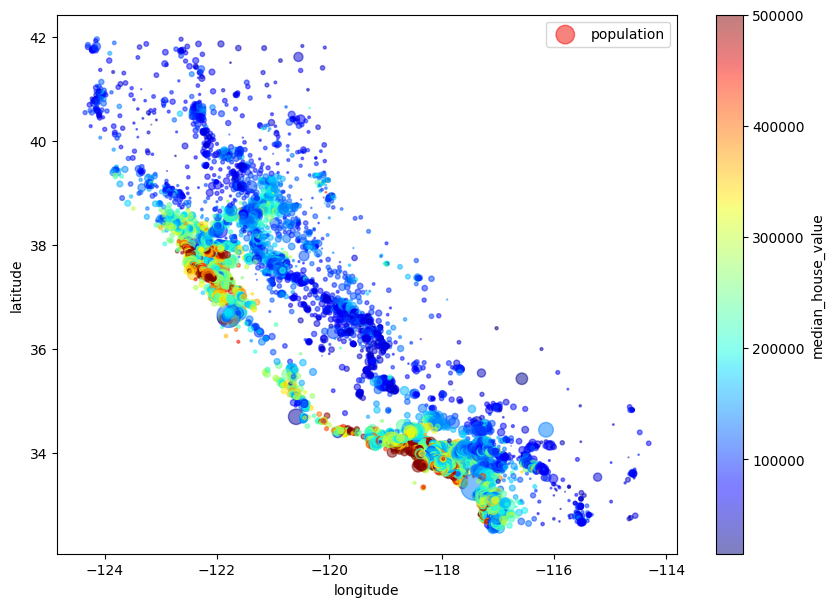

In [70]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7),
             c='median_house_value', alpha=0.5, label='population', s=housing["population"]/100,
             colorbar=True, cmap=plt.get_cmap('jet'))

plt.show()

In [71]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

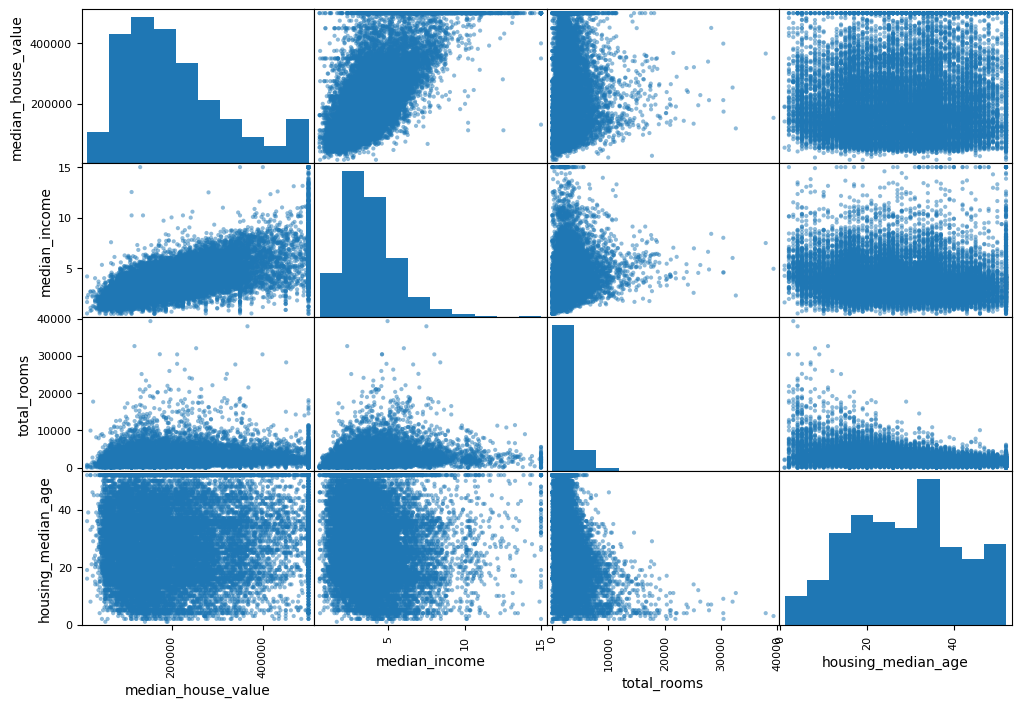

In [72]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

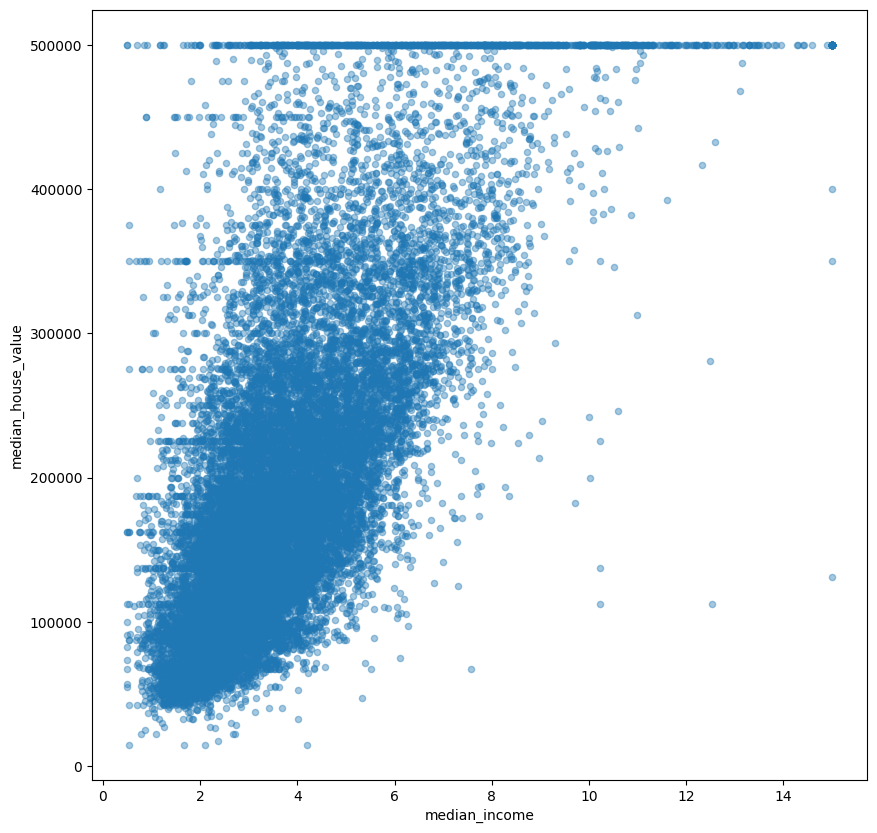

In [73]:
housing.plot(kind='scatter', y='median_house_value', x='median_income', alpha=0.4, figsize=(10, 10))
plt.show()

In [74]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

longitude


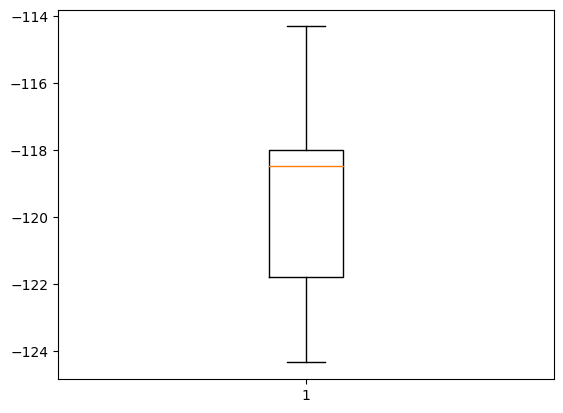

latitude


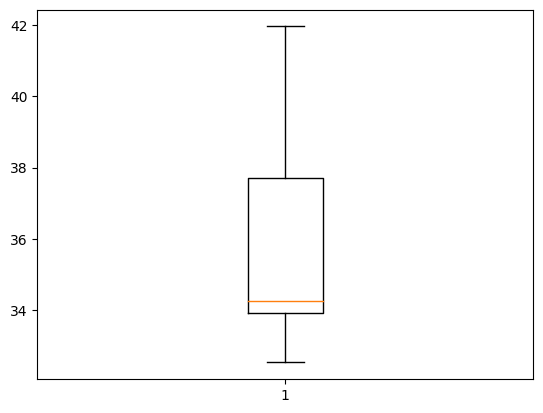

housing_median_age


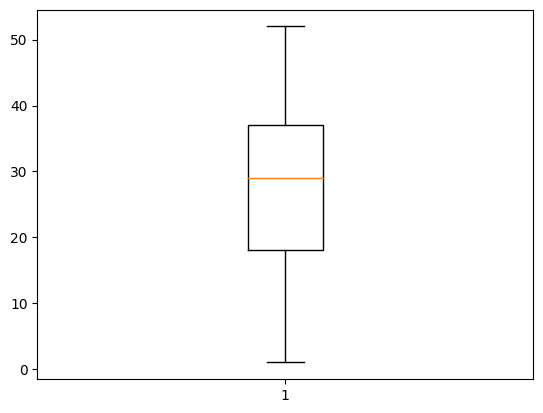

total_rooms


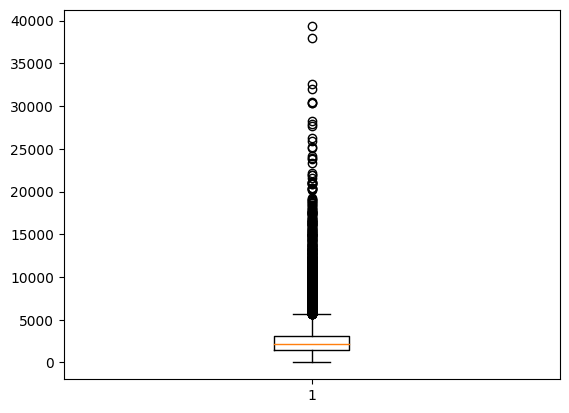

total_bedrooms


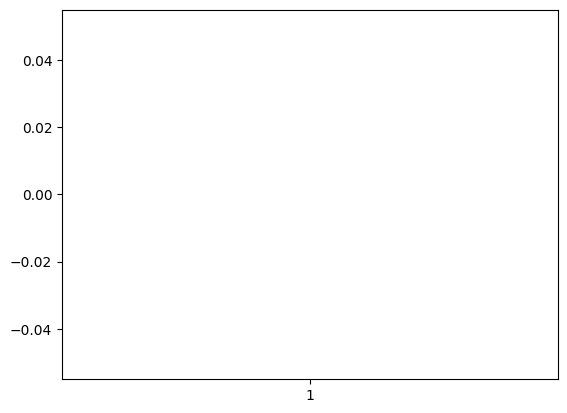

population


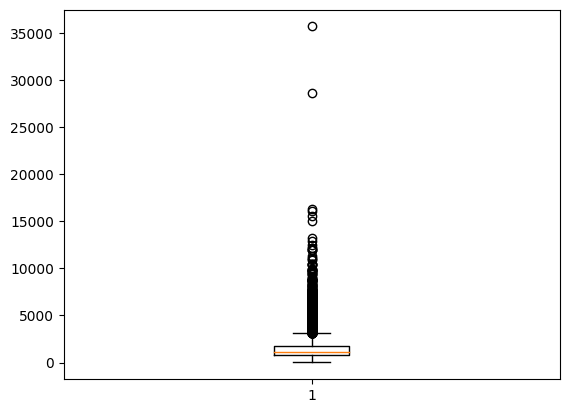

households


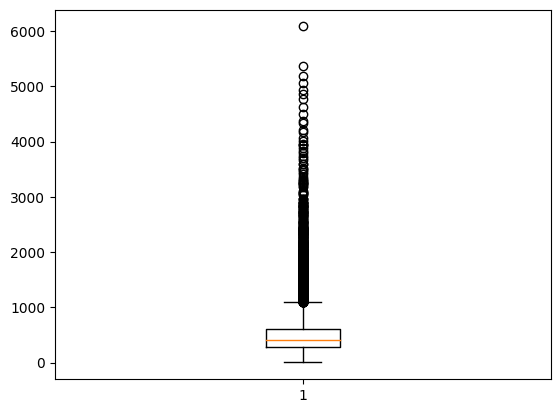

median_income


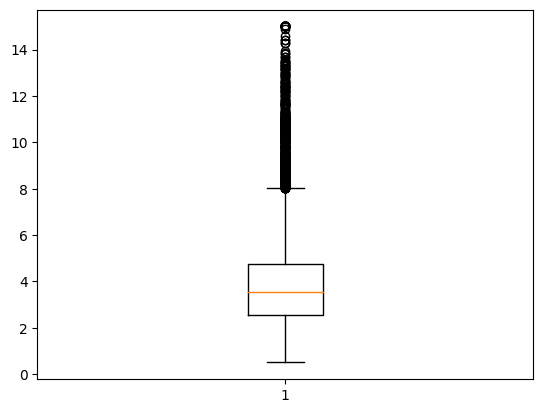

median_house_value


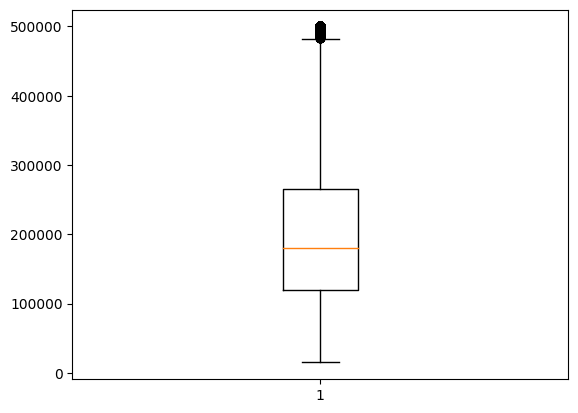

In [75]:
for column in ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 
               'households', 'median_income', 'median_house_value']:

       print(column)
       plt.boxplot(housing[column])
       plt.show()

## Data Preparation 

Split data in train and test and clean them in a way that prevents data leakage

In [76]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2)

train.shape, test.shape

((16512, 10), (4128, 10))

Imputing missing values wiith the median

In [77]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

train_num = train.drop(columns='ocean_proximity')
imputer.fit(train_num)

SimpleImputer(strategy='median')

In [78]:
imputer.statistics_

array([-1.18500e+02,  3.42600e+01,  2.90000e+01,  2.14100e+03,
        4.35000e+02,  1.17100e+03,  4.10000e+02,  3.54625e+00,
        1.80550e+05])

In [79]:
X = imputer.transform(train_num)
X_train = pd.DataFrame(X, columns=train_num.columns)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,166100.0
1,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,195700.0
2,-119.31,36.34,32.0,1893.0,453.0,1744.0,425.0,1.4729,54100.0
3,-120.85,37.77,37.0,1738.0,403.0,936.0,366.0,2.4717,77100.0
4,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,171900.0
...,...,...,...,...,...,...,...,...,...
16507,-122.25,38.17,34.0,778.0,137.0,406.0,136.0,4.2955,121300.0
16508,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,268800.0
16509,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,101300.0
16510,-118.39,34.09,28.0,2347.0,608.0,785.0,548.0,4.4167,425000.0


Handling categorical features

In [80]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_cat = train[['ocean_proximity']]
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [81]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Engineering

In [82]:
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"] = train["population"]/train["households"]

train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15108,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,166100.0,<1H OCEAN,5.472144,0.184698,2.952729
604,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,195700.0,NEAR BAY,5.032120,0.212340,2.366167
19874,-119.31,36.34,32.0,1893.0,453.0,1744.0,425.0,1.4729,54100.0,INLAND,4.454118,0.239303,4.103529
19386,-120.85,37.77,37.0,1738.0,403.0,936.0,366.0,2.4717,77100.0,INLAND,4.748634,0.231876,2.557377
11709,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,171900.0,INLAND,18.715517,0.177798,2.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,-122.25,38.17,34.0,778.0,137.0,406.0,136.0,4.2955,121300.0,NEAR BAY,5.720588,0.176093,2.985294
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,268800.0,<1H OCEAN,3.550000,0.295775,1.914789
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,101300.0,<1H OCEAN,5.277064,0.200278,3.411009
8844,-118.39,34.09,28.0,2347.0,608.0,785.0,548.0,4.4167,425000.0,<1H OCEAN,4.282847,0.259054,1.432482


In [83]:
train_labels = train['median_house_value'].copy()
train_labels

train = train.drop('median_house_value', axis=1)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15108,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,<1H OCEAN,5.472144,0.184698,2.952729
604,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,NEAR BAY,5.032120,0.212340,2.366167
19874,-119.31,36.34,32.0,1893.0,453.0,1744.0,425.0,1.4729,INLAND,4.454118,0.239303,4.103529
19386,-120.85,37.77,37.0,1738.0,403.0,936.0,366.0,2.4717,INLAND,4.748634,0.231876,2.557377
11709,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,INLAND,18.715517,0.177798,2.137931
...,...,...,...,...,...,...,...,...,...,...,...,...
9941,-122.25,38.17,34.0,778.0,137.0,406.0,136.0,4.2955,NEAR BAY,5.720588,0.176093,2.985294
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,<1H OCEAN,3.550000,0.295775,1.914789
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,<1H OCEAN,5.277064,0.200278,3.411009
8844,-118.39,34.09,28.0,2347.0,608.0,785.0,548.0,4.4167,<1H OCEAN,4.282847,0.259054,1.432482


In [89]:
train_num = train.drop('ocean_proximity', axis=1)
train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
15108,-116.96,32.85,11.0,9724.0,1796.0,5247.0,1777.0,4.1716,5.472144,0.184698,2.952729
604,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,5.032120,0.212340,2.366167
19874,-119.31,36.34,32.0,1893.0,453.0,1744.0,425.0,1.4729,4.454118,0.239303,4.103529
19386,-120.85,37.77,37.0,1738.0,403.0,936.0,366.0,2.4717,4.748634,0.231876,2.557377
11709,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,18.715517,0.177798,2.137931
...,...,...,...,...,...,...,...,...,...,...,...
9941,-122.25,38.17,34.0,778.0,137.0,406.0,136.0,4.2955,5.720588,0.176093,2.985294
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,3.550000,0.295775,1.914789
12181,-117.27,33.77,16.0,2876.0,576.0,1859.0,545.0,2.0878,5.277064,0.200278,3.411009
8844,-118.39,34.09,28.0,2347.0,608.0,785.0,548.0,4.4167,4.282847,0.259054,1.432482


In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
num_attribs = list(train_num)
cat_attribs=["ocean_proximity"]

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)])

train_prepared = full_pipeline.fit_transform(train)
train_prepared

# train_num_tr = num_pipeline.fit_transform(train_num)